<a href="https://colab.research.google.com/github/Ayushimahajan876/AyushiMahajan_GoogleGirlHackathon_Ideathon_2024/blob/main/Wildfire_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install tensorflow seaborn matplotlib pandas opencv-python numpy Pillow

['/usr/local/lib/python3.10/dist-packages/keras/api/_v2', '/usr/local/lib/python3.10/dist-packages/keras/_tf_keras', '/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/api/_v2', '/usr/local/lib/python3.10/dist-packages/tensorboard/summary/_tf', '/usr/local/lib/python3.10/dist-packages/tensorflow', '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2']


In [67]:
from google.colab import drive
drive.mount('/content/myDrive/')

Mounted at /content/myDrive/


In [68]:
!ls /content/myDrive/MyDrive/valid


nowildfire  wildfire


In [69]:
import os
import tensorflow as tf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from PIL import ImageFile

['/usr/local/lib/python3.10/dist-packages/keras/api/_v2', '/usr/local/lib/python3.10/dist-packages/keras/_tf_keras', '/usr/local/lib/python3.10/dist-packages/tensorflow_estimator/python/estimator/api/_v2', '/usr/local/lib/python3.10/dist-packages/tensorboard/summary/_tf', '/usr/local/lib/python3.10/dist-packages/tensorflow', '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2']


In [70]:
# List physical devices
for device in tf.config.list_physical_devices():
    print(device.name)

# Set TensorFlow version for Colab
try:
    get_ipython().run_line_magic('tensorflow_version', '2.x')
except Exception:
    pass

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Allow truncated images to load
ImageFile.LOAD_TRUNCATED_IMAGES = True

/physical_device:CPU:0
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [71]:
#The below code is used for image preprocessing and model training to make each
# Set image size for resizing

im_size = 224

#setting image size

image_resize = (im_size, im_size, 3)

# Set batch sizes
batch_size_training = 100
batch_size_test = 100
batch_size_validation = 100

# Set number of classes
num_classes = 2

In [72]:
#loading training,testing and validation dataset of images and visualizing each dataset through it's classes(wilfire and not wildfire)
wildfire_train_path = "/content/myDrive/MyDrive/train"
wildfire_valid_path = "/content/myDrive/MyDrive/valid"
wildfire_test_path = "/content/myDrive/MyDrive/test"

In [42]:
#fixing the datatype of image to float32 and rescaling by dividing with 255(standard)
data_generator = ImageDataGenerator(dtype='float32', rescale=1./255.)


In [73]:
wildfire_train_generator = data_generator.flow_from_directory(wildfire_train_path,
                                                   batch_size = batch_size_training,
                                                   target_size = (im_size, im_size),
                                                   class_mode = 'categorical')

wildfire_valid_generator = data_generator.flow_from_directory(wildfire_valid_path ,
                                                   batch_size = batch_size_validation,
                                                   target_size = (im_size, im_size),
                                                   class_mode = 'categorical')

wildfire_test_generator = data_generator.flow_from_directory(wildfire_test_path ,
                                                   batch_size = batch_size_test,
                                                   target_size = (im_size, im_size),
                                                   class_mode = 'categorical')

Found 30542 images belonging to 2 classes.
Found 6313 images belonging to 2 classes.
Found 6340 images belonging to 2 classes.


In [74]:
#number of classes in our target it will give 0 and 1 since no-wildfire and wildfire are the only 2 conditions
class_mapping = wildfire_train_generator.class_indices
class_mapping

{'nowildfire': 0, 'wildfire': 1}

In [45]:
#since the dataset is divided into batches the below code will give the first batch among all training datasets and it is ready to be fed on the model
first_batch_train = wildfire_train_generator.next()
first_batch_train

(array([[[[0.20000002, 0.35686275, 0.21176472],
          [0.12941177, 0.2784314 , 0.13333334],
          [0.13333334, 0.28235295, 0.13725491],
          ...,
          [0.27450982, 0.40000004, 0.21568629],
          [0.25882354, 0.38431376, 0.20000002],
          [0.2509804 , 0.3803922 , 0.19607845]],
 
         [[0.1254902 , 0.2627451 , 0.13725491],
          [0.10588236, 0.24313727, 0.11764707],
          [0.07450981, 0.21176472, 0.08627451],
          ...,
          [0.24705884, 0.36862746, 0.19607845],
          [0.20784315, 0.32941177, 0.15686275],
          [0.23137257, 0.3529412 , 0.18039216]],
 
         [[0.04705883, 0.18431373, 0.06666667],
          [0.1764706 , 0.3137255 , 0.19607845],
          [0.14117648, 0.27058825, 0.15686275],
          ...,
          [0.24313727, 0.3647059 , 0.19215688],
          [0.23137257, 0.3529412 , 0.18039216],
          [0.23529413, 0.35686275, 0.18431373]],
 
         ...,
 
         [[0.41960788, 0.45882356, 0.32156864],
          [0.43137

In [46]:
#class names in training dataset
wildfire_class_names = list(wildfire_train_generator.class_indices.keys())
print("Class names :",wildfire_class_names)

Class names : ['nowildfire', 'wildfire']


In [47]:
#class names in valid dataset
wildfire_class_names_valid = list(wildfire_valid_generator.class_indices.keys())
print("Class names :",wildfire_class_names_valid)

Class names : ['nowildfire', 'wildfire']


In [48]:
#class names in test dataset
wildfire_class_names_test = list(wildfire_test_generator.class_indices.keys())
print("Class names :",wildfire_class_names_test)

Class names : ['nowildfire', 'wildfire']


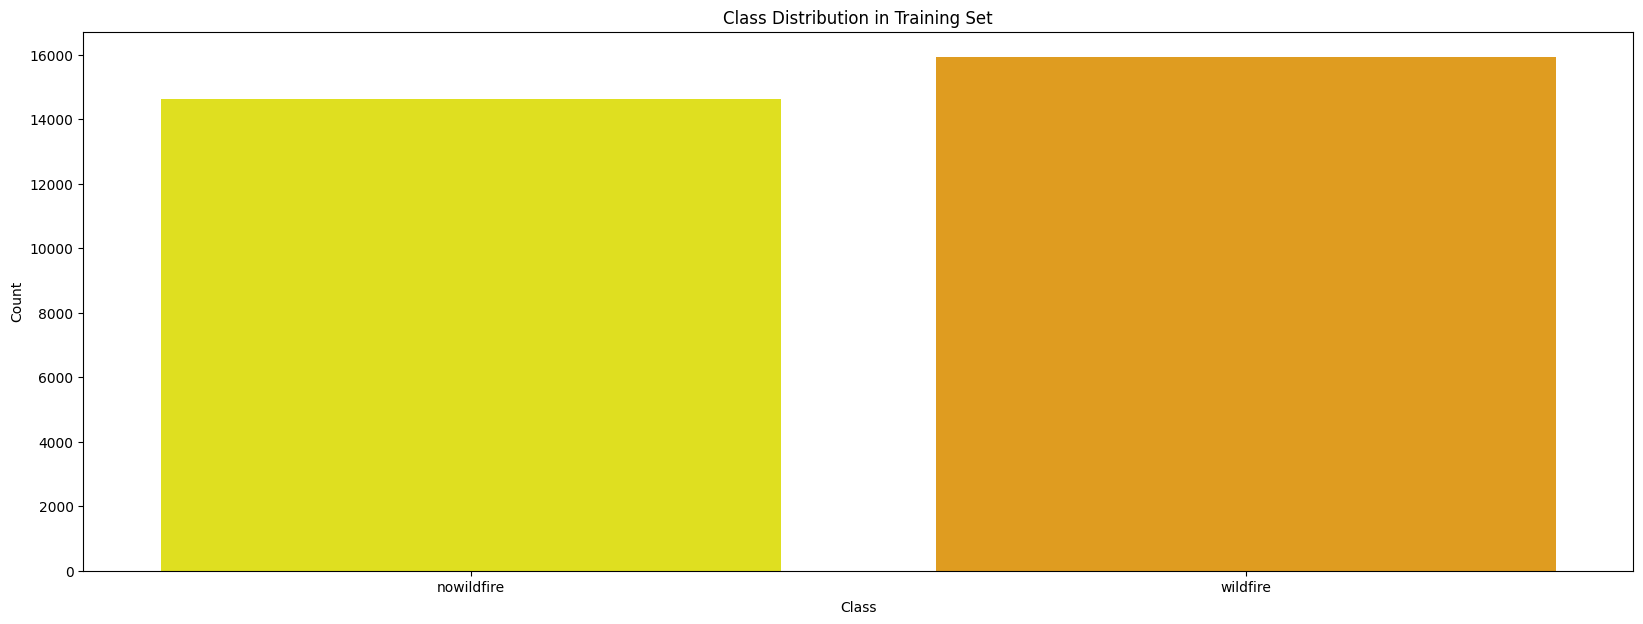

In [49]:
custom_palette = {'nowildfire': 'yellow', 'wildfire': 'orange'}

data = pd.DataFrame({'Class': wildfire_class_names, 'Count': [sum(wildfire_train_generator.labels == c) for c in range(num_classes)]})

plt.figure(figsize=(20, 7))
sns.barplot(x='Class', y='Count', data=data, palette=custom_palette)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [50]:
#Below code will count the unique labels which will be equal to 2 and number of images belonging to wildfire and notwildfire class in training dataset
labels_train = wildfire_train_generator.classes
unique_labels_train, label_counts_train = np.unique(labels_train, return_counts=True)

print("Number of  labels in training data used for wildfire prediction:", len(unique_labels_train))
for label, count in zip(unique_labels_train, label_counts_train):
    print("Label:", wildfire_class_names[label], "- Count:", count)

Number of  labels in training data used for wildfire prediction: 2
Label: nowildfire - Count: 14621
Label: wildfire - Count: 15921


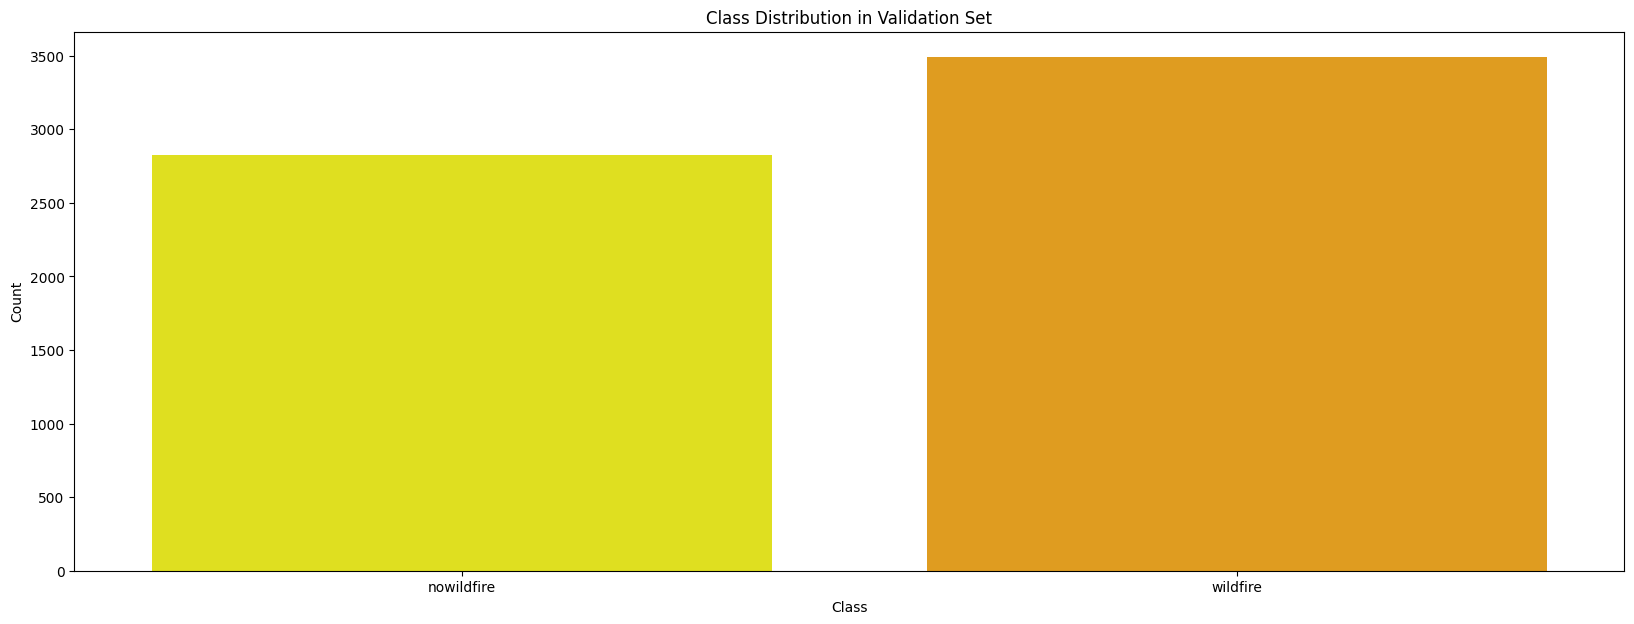

In [51]:
custom_palette = {'nowildfire': 'yellow', 'wildfire': 'orange'}

data = pd.DataFrame({'Class': wildfire_class_names, 'Count': [sum(wildfire_valid_generator.labels == c) for c in range(num_classes)]})

plt.figure(figsize=(20, 7))
sns.barplot(x='Class', y='Count', data=data, palette=custom_palette)
plt.title('Class Distribution in Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [52]:
#Below code will count the unique labels which will be equal to 2 and number of images belonging to wildfire and notwildfire class in valid dataset
labels_valid = wildfire_valid_generator.classes
unique_labels_valid, label_counts_valid = np.unique(labels_valid, return_counts=True)

print("Number of unique labels in valid data:", len(unique_labels_valid))
for label, count in zip(unique_labels_valid, label_counts_valid):
    print("Label:", wildfire_class_names_valid[label], "- Count:", count)


Number of unique labels in valid data: 2
Label: nowildfire - Count: 2824
Label: wildfire - Count: 3489


In [ ]:
#Now Model training and compilation is done (Used CNN for best accuracy)

In [53]:
#loading predefined keras model
%ls /content/myDrive/MyDrive/models

wildfire_CNN_model = load_model('/content/myDrive/MyDrive/models/kerasModel.h5')

kerasModel.h5


In [54]:
#it is a base CNN model using specific number of repetitions of CNN

def base_model(input_shape, repetitions):

  input_ = tf.keras.layers.Input(shape=input_shape, name='input')
  x = input_

  for i in range(repetitions):
    n_filters = 2**(4 + i)
    x = Conv2D(n_filters, 3, activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(2)(x)

  return x, input_

In [55]:
def final_model(input_shape, repetitions):

    x, input_ = base_model(input_shape, repetitions)

    x = Conv2D(64, 3, activation='relu')(x)
    x = GlobalAveragePooling2D()(x)
    class_out = Dense(num_classes, activation='softmax', name='class_out')(x)

    model = Model(inputs=input_, outputs=class_out)

    print(model.summary())
    return model

In [56]:
#final CNN model

wildfire_CNN_model = final_model(image_resize, 4)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_4 (Bat  (None, 222, 222, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_5 (Bat  (None, 109, 109, 32)      128 

In [85]:
#remove existing logs before starting training the model

get_ipython().system('rm -rf logs')


In [76]:
#model is configured keeping in mind the accuracy to produce accurate results
wildfire_CNN_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [77]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
checkpoint = tf.keras.callbacks.ModelCheckpoint('saved_model/custom_best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, tensorboard_callback]

In [84]:
#Training dataset(i.e. satellite imagery) is passed 1 times through CNN
num_epochs = 1
#Number of steps(batches) sent per epoch
steps_per_epoch_wildfire_training = len(wildfire_train_generator)
steps_per_epoch_wildfire_validation = len(wildfire_valid_generator)

In [86]:
#training the Model
wildfire_trained_CNN_model = wildfire_CNN_model.fit_generator(
    wildfire_train_generator,
    steps_per_epoch=steps_per_epoch_wildfire_training,
    epochs=num_epochs,
    validation_data=wildfire_valid_generator,
    validation_steps=steps_per_epoch_wildfire_validation,
    verbose=1,
    callbacks=[callbacks_list],
)

  1/306 [..............................] - ETA: 44:52 - loss: 0.0909 - accuracy: 0.9800

KeyboardInterrupt: 

In [80]:
#After training the Model ,Let's analyse the model accuracy via plots of accuracy and loss
wildfire_CNN_model .save('saved_model/custom_model')
print("Model saved!")

Model saved!


In [83]:
#plot for model accuracy
def plot_acc(wildfire_trained_model_CNN):
  plt.figure(figsize=(20, 10))
  sns.set_style('whitegrid')
  plt.plot(wildfire_trained_model_CNN.history['accuracy'])
  plt.plot(wildfire_trained_model_CNN.history['val_accuracy'])
  plt.title('Wildfire Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
  plt.show()
plot_acc(wildfire_trained_CNN_model)

NameError: name 'wildfire_trained_CNN_model' is not defined

In [ ]:
# plot for model loss
def plot_loss(wildfire_trained_model_CNN ):
  plt.figure(figsize=(20, 10))
  sns.set_style('whitegrid')
  plt.plot(wildfire_trained_model_CNN .history['loss'])
  plt.plot(wildfire_trained_model_CNN .history['val_loss'])
  plt.title('Wildfire Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['loss', 'val_loss'], loc='upper left')
  plt.show()
plot_loss(wildfire_trained_CNN_model)

In [ ]:
#Now we have are done with data preprocessing,rescaling,loading,Model training and analysing the model
#Let's dive into the exciting part i.e. testing the data (how well our model behaves in case of unseen data)
#made the data frames for prediction

In [ ]:
filenames = wildfire_test_generator.filenames
wildfire_predictions = wildfire_CNN_model.predict_generator(wildfire_test_generator, steps=len(wildfire_test_generator), verbose=1).round(3)


In [ ]:
filenames_df = pd.DataFrame(filenames, columns=['File Path'])
predicted_df = pd.DataFrame(wildfire_predictions, columns=['No Wildfire Probability', 'Wildfire Probability'])
model_predictions = pd.concat([filenames_df, predicted_df], axis=1)
model_predictions

In [ ]:
# Predictions made by the model are saved to CSV file named model_predictions
file_name='/content/gdrive/MyDrive/Colab Notebooks/wildfire-prediction-images/predictions/model_predictions.csv'
model_predictions.to_csv(file_name, sep=',', encoding='utf-8')

In [ ]:
#once the model is trained we can just put the image and detect it using simple technique
#But to make the model (CNN model)work more accurate and more efficient we will build CAM(Class Activation Map for the input image) and then classify

In [ ]:
outputs = [layer.output for layer in wildfire_CNN_model.layers[1:9]]


In [ ]:
visualize_model = Model(wildfire_CNN_model.input, outputs)
layer_names = []
for layer in outputs:
    layer_names.append(layer.name.split("/")[0])
print("Layers that will be used for visualization: ")
print(layer_names)

In [ ]:
gap_weights = wildfire_CNN_model.layers[-1].get_weights()[0]
gap_weights.shape
cam_model  = Model(inputs=wildfire_CNN_model.input, outputs=(wildfire_CNN_model.layers[-3].output,wildfire_CNN_model.layers[-1].output))
cam_model.summary()

In [ ]:
cam_model.save('saved_model/cam_model')
print("Model saved!")

In [10]:
def show_cam(image_value, features, results):

  features_for_img = features[0]
  prediction = results[0]

  class_activation_weights = gap_weights[:,0]
  class_activation_features = sp.ndimage.zoom(features_for_img, (im_size/10, im_size/10, 1), order=2)
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # Visualize the results
  plt.figure(figsize=(12, 12))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.title('Class Activation Map')
  #show the probabilites of wildfire and no wildfire
  plt.figtext(.5, .05, f"No Wildfire Probability: {results[0][0] * 100}%\nWildfire Probability: {results[0][1] * 100}%", ha="center", fontsize=12, bbox={"facecolor":"green", "alpha":0.5, "pad":3})
  plt.colorbar()
  plt.show()

In [ ]:
#image will be the input and it is converted to CAM(class activation map) and is classified whether there is wildfire probablity or not
def convert_and_classify(image):

  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img = cv2.resize(img, (im_size, im_size)) / 255.0
  tensor_image = np.expand_dims(img, axis=0)
  features, results = cam_model.predict(tensor_image)

  # generate the CAM
  show_cam(tensor_image, features, results)




In [ ]:
#upload the picture to predict
from google.colab import files
from keras.preprocessing import image
from numpy import asarray

In [ ]:
uploaded = files.upload()

In [ ]:
for fn in uploaded.keys():

  # CAM Model Prediction
  width = im_size
  height = im_size
  dim = (width, height)
  path = '/content/gdrive/MyDrive/Colab Notebooks/AI Data/' + fn
  img = cv2.imread(path)
  print('CAM Model Predicton:\n')
  convert_and_classify(path)

In [ ]:

#we will show by giving the images as the input how it will create and classify the image(some outputs show through general approach also)

#try to visualise data more and more for better understanding(all todos)

#This model accuracy is alone 95.3% .(todo)show error also accuracy confusion matrix and all for better understanding ki why my code is good


In [ ]:
# After successful prediction of the wildfire using CNN and CAM through satellite imagery
#It not only predicts whether there is wildfire or not but it gives the probability of happening and not happening of wildfire



#Relief and reponse efforts
#specifically choosing uttarakhand as a target state since it has seen my wildfires till 2000 and now
#once an area of uttarakhand is detected using the CNN model that takes the satellite imagery during the wildfire
#we can use the latitude and longitude of the area to fetch nearby organisations like NGO'S,police stations and healthcare
#we can send alerts to them using phone numbers and emails since the phone number will be available
#There can be the case that no wildfire detected and false alarms can be sent for this situation.we will not show any nearby service and keep it  saying that no servic available you are safe